# Блок 1.

С помощью symPy найдите полиномы, описывающие данные наборы точек. Затем проведите полное исследование каждого полученного полинома: проверьте четность/нечетность, найдите нули, промежутки знакопостоянства. Постройте их графики. С помощью изменения промежутка для х добейтесь того, чтобы все нули были отображены на графике функции. <br><br><br>
а) $(-4; -4268), (-3; -1227), (-1; -17), (1; 17), (3; 1227), (4; 4268)$<br><br>
б)$ (-4; -16729), (-3; -3999), (-1; 5), (1; 1), (3; 4005), (4; 16735)$


In [4]:
from sympy import *
from sympy.plotting import plot
from sympy.solvers.inequalities import solve_univariate_inequality

init_printing(use_unicode=False, wrap_line=False, no_global =True)

а) $(-4; -4268), (-3; -1227), (-1; -17), (1; 17), (3; 1227), (4; 4268)$<br><br>

In [5]:
#т.к. у нас тут 6 точек, то нужен полином 5й степени
#создадим переменные
a5, a4, a3,a2, a1, a0, x = symbols("a5, a4, a3, a2, a1, a0, x")
#запишем полином
f = a5*x**5 + a4*x**4 + a3*x**3 + a2*x**2 + a1*x +a0
f

In [13]:
#Подставим тчоки в полином и запишем полученные уравненя  в систему
eq1_lp = f.subs(x, -4) + 4268
eq2_lp = f.subs(x, -3) + 1227
eq3_lp = f.subs(x, -1) + 17
eq4_lp = f.subs(x, 1) -17
eq5_lp = f.subs(x, 3) - 1227
eq6_lp = f.subs(x, 4) - 4268

In [15]:
# решим полученную систему
nonlinsolve([eq1_lp, eq2_lp, eq3_lp, eq4_lp, eq5_lp, eq6_lp], [a5, a4, a3, a2, a1, a0])

In [16]:
#Запишем полученный полином
f_new = 3*x**5 +19*x**3 -5*x
f_new

In [17]:
f_new.subs(x, -x)

Функция является нечетной, это уже и так было видно из точек, но тут я на всякий случай проверил

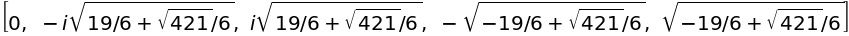

In [18]:
#Найдем нули функции
solve(f_new)

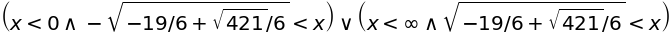

In [19]:
#найдем промежутки знаков постоянства
solve_univariate_inequality(f_new>0, x)

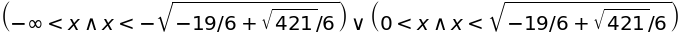

In [20]:
solve_univariate_inequality(f_new<0, x)

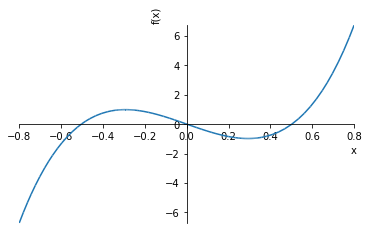

In [26]:
#Построим график
plot(f_new,(x, -0.8, 0.8))

б)$ (-4; -16729), (-3; -3999), (-1; 5), (1; 1), (3; 4005), (4; 16735)$

In [27]:
#аналогично на 6 точке нужен полином 5й степени
a5, a4, a3,a2, a1, a0, x = symbols("a5, a4, a3, a2, a1, a0, x")
#запишем полином
f = a5*x**5 + a4*x**4 + a3*x**3 + a2*x**2 + a1*x +a0
f

In [28]:
#Подставим тчоки в полином и запишем полученные уравненя  в систему
eq1_lp = f.subs(x, -4) + 16729
eq2_lp = f.subs(x, -3) + 3999
eq3_lp = f.subs(x, -1) -5
eq4_lp = f.subs(x, 1) - 1
eq5_lp = f.subs(x, 3) - 4005
eq6_lp = f.subs(x, 4) - 16735

In [29]:
# решим полученную систему
nonlinsolve([eq1_lp, eq2_lp, eq3_lp, eq4_lp, eq5_lp, eq6_lp], [a5, a4, a3, a2, a1, a0])

In [30]:
#Запишем полученный полином
f2_new = 16*x**5 +7*x**3 -25*x+3
f2_new

In [33]:
f2_new.subs(x, -x)

Функция не является ни четной ни нечетной

In [42]:
#найдем нули
solve(f2_new)

In [43]:
#Получили что-то не красивое, посмотрим приближенное значение
print([N(solution) for solution in solve(f2_new)])

[-1.05748920058586, 0.120506253533285, 0.986407581732483, -0.0247123173399549 - 1.22107053052891*I, -0.0247123173399549 + 1.22107053052891*I]


In [35]:
#найдем промежутки знаков постоянства
solve_univariate_inequality(f2_new>0, x)

In [37]:
solve_univariate_inequality(f2_new<0, x)

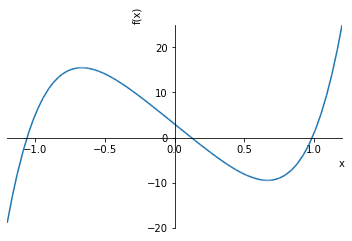

In [45]:
#Построим график
plot(f2_new,(x, -1.2, 1.2))

# Блок 2.

In [5]:
from sympy import *
from sympy.plotting import plot
init_printing(use_unicode=False, wrap_line=False, no_global=True)

In [6]:
import matplotlib.pyplot as plt
import numpy as np

In [7]:
x = Symbol('x')

## 1.
### Получите значение MSE меньшее 5.

In [49]:
def print_points_ands_function1(sympy_function):
    def function(x_): return float(sympy_function.subs(x, x_))
    
    points_X = np.array([-2, -1, 0, 1, 2, 3, 3.5, 4, 4.5, 5])
    points_Y = np.array([2, -4, 1, 8, 21, 40, 47, 65, 75, 92])
    plt.xlim(-6, 10)
    plt.ylim(-1, 100)
    
    plt.scatter(points_X, points_Y, c='r')
    x_range = np.linspace(plt.xlim()[0], plt.xlim()[1], num=100)
    function_Y = [function(x_) for x_ in x_range]
    plt.plot(x_range, function_Y, 'b')
    plt.show()
    
    MSE = sum([(points_Y[i] - function(points_X[i]))**2 for i in range(len(points_Y))]) / len(points_Y)
    print(f'MSE = {MSE}')

In [50]:
f1 = 48 * x**2 - 128 * x + 83
f1

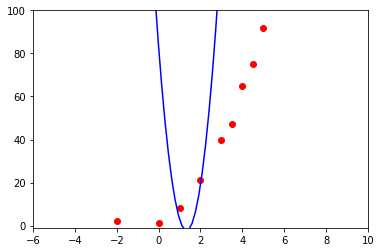

MSE = 93691.3


In [51]:
print_points_ands_function1(f1)

In [84]:
f1_new = f1/18
f1_new = f1_new.subs(x, x+2.2)
f1_new

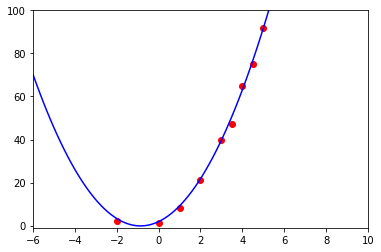

MSE = 4.045279012345675


In [85]:
print_points_ands_function1(f1_new)

## 2.
### Получите значение MSE меньшее 35.

In [8]:
def print_points_ands_function2(sympy_function):
    def function(x_): return float(sympy_function.subs(x, x_))
    
    points_X = np.array([-2, -1, 0, 1, 2, 3, 3.5, 4, 4.5, 5])
    points_Y = np.array([-31, -9, 4, -1, 9, 24, 47, 92, 120, 170])
    plt.xlim(-3, 6)
    plt.ylim(-35, 200)
    
    plt.scatter(points_X, points_Y, c='r')
    x_range = np.linspace(plt.xlim()[0], plt.xlim()[1], num=100)
    function_Y = [function(x_) for x_ in x_range]
    plt.plot(x_range, function_Y, 'b')
    plt.show()
    
    MSE = sum([(points_Y[i] - function(points_X[i]))**2 for i in range(len(points_Y))]) / len(points_Y)
    print(f'MSE = {MSE}')

In [9]:
f2 = 4 * x**3 + 30 * x**2 + 74 * x + 62
f2

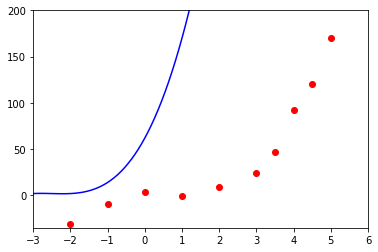

MSE = 607200.2


In [10]:
print_points_ands_function2(f2)

In [11]:
f2_new = f2.subs(x, (x-3.7)/1.25)
f2_new

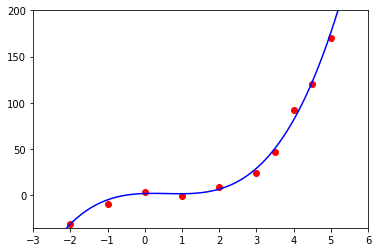

MSE = 22.92423052697598


In [12]:
print_points_ands_function2(f2_new)

## 3.
### Получите значение MSE меньшее 3300.

In [116]:
def print_points_ands_function3(sympy_function):
    def function(x_): return float(sympy_function.subs(x, x_))
    
    points_X = np.array([-2, -1, 0, 1, 2, 3, 3.5, 4, 4.5, 5])
    points_Y = np.array([60, 25, 4, -0, -57, -195, -295, -540, -700, -760])
    plt.xlim(-10, 6)
    plt.ylim(-850, 100)
    
    plt.scatter(points_X, points_Y, c='r')
    x_range = np.linspace(plt.xlim()[0], plt.xlim()[1], num=100)
    function_Y = [function(x_) for x_ in x_range]
    plt.plot(x_range, function_Y, 'b')
    plt.show()
    
    MSE = sum([(points_Y[i] - function(points_X[i]))**2 for i in range(len(points_Y))]) / len(points_Y)
    print(f'MSE = {MSE}')

In [117]:
f3 = -36 * x**3 - 756 * x**2 - 5334 * x - 12636
f3

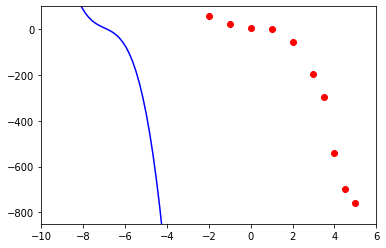

MSE = 1346344545.35


In [118]:
print_points_ands_function3(f3)

In [143]:
f3_new = f3.subs(x, (x-13.5)/2)
f3_new

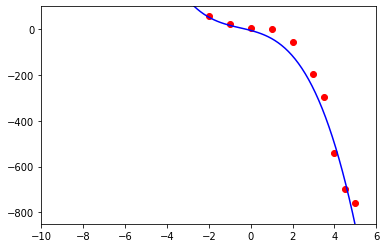

MSE = 2759.478125


In [144]:
print_points_ands_function3(f3_new)

## 4.
### Получите значение MSE меньшее 25.

In [145]:
def print_points_ands_function4(sympy_function):
    def function(x_): return float(sympy_function.subs(x, x_))
    
    points_X = np.array([-2, -1, 0, 1, 2, 3, 3.5, 4, 4.5, 5])
    points_Y = np.array([-42, -37, -23, -36, -45, -80, -83, -110, -131, -155])
    plt.xlim(-4, 20)
    plt.ylim(-160, -10)
    
    plt.scatter(points_X, points_Y, c='r')
    x_range = np.linspace(plt.xlim()[0], plt.xlim()[1], num=100)
    function_Y = [function(x_) for x_ in x_range]
    plt.plot(x_range, function_Y, 'b')
    plt.show()
    
    MSE = sum([(points_Y[i] - function(points_X[i]))**2 for i in range(len(points_Y))]) / len(points_Y)
    print(f'MSE = {MSE}')

In [146]:
f4 = - 5 / 4 * x**2 + 25 * x - 152
f4

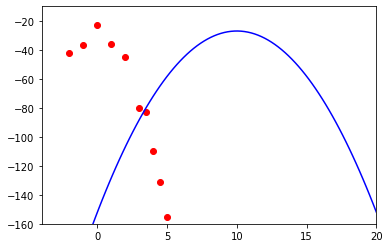

MSE = 9143.51953125


In [147]:
print_points_ands_function4(f4)

In [229]:
f4_new = f4.subs(x,(x+ 4.8)*2.05)
f4_new

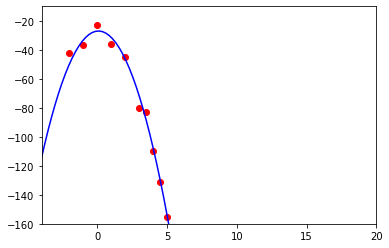

MSE = 21.685025059570254


In [230]:
print_points_ands_function4(f4_new)